# ML_Gesture_Recognition using Sklearn
#By- Aarush Kumar
#Dated: October 03,2021

In [1]:
from IPython.display import Image
Image(url='https://cdn.analyticsvidhya.com/wp-content/uploads/2018/10/MULTITOUCH_AND_GESTURE_RECOGNITION.jpg')

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import copy
from sklearn.model_selection import KFold
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [3]:
rock_data = pd.read_csv("/home/aarush100616/Downloads/Projects/ML gesture recognition/Data/0.csv", header=None )
scissors_data = pd.read_csv("/home/aarush100616/Downloads/Projects/ML gesture recognition/Data/1.csv", header=None )
paper_data = pd.read_csv("/home/aarush100616/Downloads/Projects/ML gesture recognition/Data/2.csv", header=None )
ok_data = pd.read_csv("/home/aarush100616/Downloads/Projects/ML gesture recognition/Data/3.csv", header=None )
data = pd.concat([rock_data, scissors_data, paper_data, ok_data], axis = 0)
X = data.drop(data.columns[-1],axis=1)
y = data[data.columns[-1]]
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.head(5)

0     1    2    3     4     5     6    7     8     9   ...    54   55  \
1986   3.0  -1.0  1.0  3.0   2.0   5.0   2.0  1.0  -5.0  -2.0  ...   2.0 -2.0   
947   51.0  21.0  4.0  3.0  23.0  58.0  16.0  6.0  15.0  13.0  ...  -9.0  7.0   
944   -3.0   0.0 -3.0  1.0  27.0  21.0  -1.0 -7.0   4.0  -1.0  ...  -1.0  4.0   
1869  -5.0  19.0 -2.0  3.0 -12.0  -9.0 -13.0  0.0   8.0  19.0  ...  -6.0  5.0   
860  -11.0  -1.0  0.0  7.0  14.0   3.0   2.0  1.0  -2.0   3.0  ... -16.0 -3.0   

       56    57   58   59    60    61   62    63  
1986  0.0  -1.0  3.0  0.0 -14.0   0.0 -1.0   2.0  
947   4.0   0.0  2.0  0.0 -54.0 -67.0 -4.0 -12.0  
944   1.0   4.0  1.0  2.0  -4.0  -3.0  2.0   3.0  
1869 -4.0  10.0  4.0  2.0 -21.0 -10.0 -1.0 -36.0  
860   2.0  19.0  5.0  5.0 -10.0  70.0  4.0 -14.0  

[5 rows x 64 columns]

In [4]:
#Check the number of times each gesture occurs in training data.
y_train.value_counts()
print("Dataset samples:",len(y))

Dataset samples: 11678


In [5]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Predictive Accuracy")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,verbose=2)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")
    print("CV Scores:",test_scores_mean)

    return plt

Automatically created module for IPython interactive environment


In [6]:
def r2(a,b):
    this_correlation = np.corrcoef(a, b)[0,1]
    this_r2 = this_correlation**2
    return this_r2

In [7]:
def plot_confusion(title, model, X_train, y_train, X_test, y_test):
    svm_confusion_matrix = plot_confusion_matrix(model, X_train, y_train,
                      display_labels=['Rock','Scissors', 'Paper', 'Ok'],
                      cmap=plt.cm.YlOrBr)
    svm_confusion_matrix.ax_.set_title(title + " Confusion Matrix (Training Set)")
    plt.show()

    svm_confusion_matrix = plot_confusion_matrix(model, X_test, y_test,
                          display_labels=['Rock','Scissors', 'Paper', 'Ok'],
                          cmap=plt.cm.YlOrBr)
    svm_confusion_matrix.ax_.set_title(title + " Confusion Matrix (Testing Set)")
    plt.show()

## Decision Tree

Decision Tree Train Accuracy 0.7981160351102548
Decision Tree Test Accuracy 0.747431506849315
[learning_curve] Training set sizes: [ 840 2732 4623 6515 8407]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  50 | elapsed:    3.1s remaining:    3.1s


CV Scores: [0.67287281 0.73378397 0.74630924 0.75583403 0.74984278]


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    4.6s finished


<module 'matplotlib.pyplot' from '/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

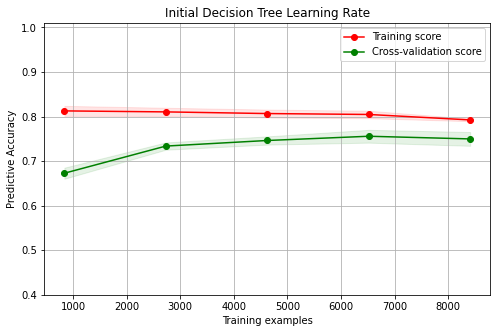

In [8]:
#Estimate parameters
decision_tree = tree.DecisionTreeClassifier(max_depth=10, 
                                  criterion='entropy',
                                  min_samples_leaf=10,
                                  min_samples_split=5,
                                  random_state=0)
decision_tree.fit(X_train, y_train)

y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

print('Decision Tree Train Accuracy' , accuracy_score(y_train, y_train_pred))
print('Decision Tree Test Accuracy' , accuracy_score(y_test, y_test_pred))

cv = KFold(n_splits=10, random_state=0, shuffle=True)

fig, axes = plt.subplots(1,1, figsize=(8, 5))
plot_learning_curve(decision_tree, "Initial Decision Tree Learning Rate", 
                    X_train, y_train, axes=[axes], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [9]:
dt_params = {
    "criterion":['gini','entropy'],
    "max_depth":range(5,30),
    "min_samples_leaf":range(1,5),
    "min_samples_split":range(1,5)
}
decision_tree = tree.DecisionTreeClassifier()


grid = GridSearchCV(decision_tree,
                    param_grid = dt_params,
                    cv=10,
                    verbose=1,
                    n_jobs=-1
)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.59227038 0.59259124 0.59237733        nan 0.59259124
 0.59227004 0.59227004        nan 0.59227027 0.59259124 0.59259124
        nan 0.59269853 0.59269853 0.59280537        nan 0.65692405
 0.65681698 0.65703111        nan 0.65703088 0.65713818 0.65703111
        nan 0.6578873  0.65799425 0.65745926        nan 0.65788741
 0.65767351 0.65788753        nan 0.69171455 0.69171409 0.69117922
        nan 0.69096509 0.69064389 0.69096532        nan 0.69171455
 0.69128617 0.69128629        nan 0.69160726 0.69171455 0.69214247
        nan 0.71729906 0.71772722 0.71847634        nan 0.71729895
 0.7170847  0.71836973        nan 0.71879765 0.71740625 0.71815525
        nan 0.71890449 0.71847645 0.71815548        nan 0.74020635
 0.74009951 0.74031353        nan 0.7397782  0.74095512 0.73870765
        nan 0.73956395 0.73

{'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [10]:
start_time = time.time();
decision_tree = tree.DecisionTreeClassifier(max_depth=20,
                                  criterion='gini',
                                  random_state=0,
                                  min_samples_leaf=1,
                                  min_samples_split=3)
decision_tree.fit(X_train, y_train)
print("Training time:",time.time()-start_time)

start_time = time.time();
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)
print("Prediction Time:",time.time()-start_time, "for",len(X_train) + len(X_test),"samples")

print('Decision Tree Train Accuracy' , accuracy_score(y_train, y_train_pred))
print("Decision Tree Train r2 score:",r2(y_train, y_train_pred))
print('Decision Tree Test Accuracy' , accuracy_score(y_test, y_test_pred))
print("Decision Tree Test r2 score:",r2(y_test, y_test_pred))
print("F1 SCORE:",round(f1_score(y_test, y_test_pred, average='micro'),3))

Training time: 0.47927260398864746
Prediction Time: 0.006931781768798828 for 11678 samples
Decision Tree Train Accuracy 0.9653179190751445
Decision Tree Train r2 score: 0.904173855431744
Decision Tree Test Accuracy 0.8082191780821918
Decision Tree Test r2 score: 0.5127194528515306
F1 SCORE: 0.808


[learning_curve] Training set sizes: [ 840 2732 4623 6515 8407]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  50 | elapsed:    2.4s remaining:    2.4s


CV Scores: [0.69707108 0.74662964 0.76643314 0.77917118 0.79169451]


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    4.9s finished


<module 'matplotlib.pyplot' from '/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

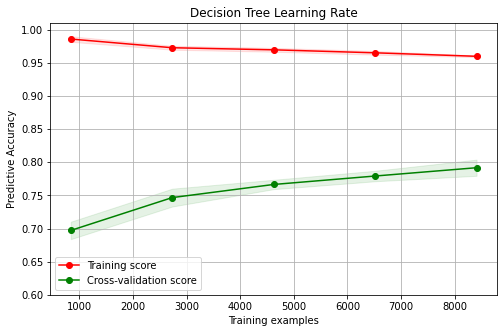

In [11]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)

estimator = tree.DecisionTreeClassifier(max_depth=20,
                                  criterion='gini',
                                  random_state=0,
                                  min_samples_leaf=1,
                                  min_samples_split=3)
fig, axes = plt.subplots(1,1, figsize=(8, 5))
plot_learning_curve(estimator, "Decision Tree Learning Rate", X_train, y_train, axes=[axes], ylim=(0.6, 1.01),
3                    cv=cv, n_jobs=4)

## SVM Model

Using Poly Kernel:
SVM Train Accuracy 0.755726825090987
SVM Test Accuracy 0.523972602739726
[learning_curve] Training set sizes: [ 840 2732 4623 6515 8407]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  50 | elapsed:  1.2min remaining:  1.2min


CV Scores: [0.33440003 0.41072198 0.45257452 0.49046789 0.51830114]


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  2.5min finished


<module 'matplotlib.pyplot' from '/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

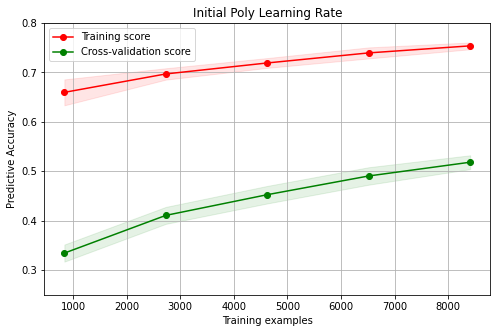

In [12]:
svm = SVC(kernel='poly',
          C=1,
          degree=3,
          random_state=0)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("Using Poly Kernel:")
print('SVM Train Accuracy' , accuracy_score(y_train, y_train_pred))
print('SVM Test Accuracy' , accuracy_score(y_test, y_test_pred))

cv = KFold(n_splits=10, random_state=0, shuffle=True)
fig, axes = plt.subplots(1,1, figsize=(8, 5))
plot_learning_curve(svm, "Initial Poly Learning Rate", X_train, y_train, axes=[axes], ylim=(0.25, 0.8),
                    cv=cv, n_jobs=4)

## GridSearch poly kernel SVM parameters

In [13]:
svm_params1 = {
    "kernel":['poly'],
    "degree":range(1,5),
    "C":[0.01,0.1,1,10]
}

svm = SVC()
grid = GridSearchCV(svm,
                    param_grid = svm_params1,
                    cv=10,
                    verbose=1,
                    n_jobs=-1
)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
{'C': 10, 'degree': 2, 'kernel': 'poly'}


In [14]:
svm_params1 = {
    "kernel":['rbf'],
    "gamma":['scale','auto']
}

svm = SVC()
grid = GridSearchCV(svm,
                    param_grid = svm_params1,
                    cv=10,
                    verbose=1,
                    n_jobs=-1
)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
{'gamma': 'scale', 'kernel': 'rbf'}


In [15]:
start_time = time.time();
svm = SVC(kernel='rbf',
          gamma='scale',
          random_state=0)
svm.fit(X_train, y_train)

print("Execution Time:",time.time()-start_time)

start_time = time.time();
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
print("Prediction Time:",time.time()-start_time, "for",len(X_train) + len(X_test),"samples")

print("\nUsing RBF Kernel:")
print('SVM Train Accuracy' , accuracy_score(y_train, y_train_pred))
print("SVM Train r2 score:",r2(y_train, y_train_pred))
print('SVM Test Accuracy' , accuracy_score(y_test, y_test_pred))
print("SVM Test r2 score:",r2(y_test, y_test_pred))
print("F1 SCORE:",round(f1_score(y_test, y_test_pred, average='micro'),3))

Execution Time: 7.431988477706909
Prediction Time: 7.124355316162109 for 11678 samples

Using RBF Kernel:
SVM Train Accuracy 0.9215371440804967
SVM Train r2 score: 0.8720114364463071
SVM Test Accuracy 0.8809931506849316
SVM Test r2 score: 0.8123249692242756
F1 SCORE: 0.881


[learning_curve] Training set sizes: [ 840 2732 4623 6515 8407]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  50 | elapsed:   50.2s remaining:   50.2s


CV Scores: [0.67640681 0.79115735 0.82808735 0.85110204 0.85998637]


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.7min finished


<module 'matplotlib.pyplot' from '/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

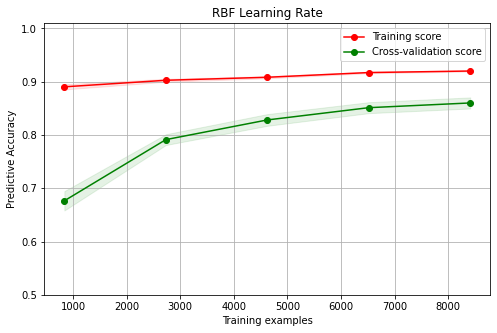

In [16]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
fig, axes = plt.subplots(1,1, figsize=(8, 5))
plot_learning_curve(svm, "RBF Learning Rate", X_train, y_train, axes=[axes], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

In [17]:
start_time = time.time();
svm = SVC(kernel='poly',
          C=10,
          degree=2,
          random_state=0)
svm.fit(X_train, y_train)

print("Execution Time:",time.time()-start_time)

start_time = time.time();
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
print("Prediction Time:",time.time()-start_time, "for",len(X_train) + len(X_test),"samples")

print("Using Poly Kernel:")
print('SVM Train Accuracy' , accuracy_score(y_train, y_train_pred))
print("SVM Train r2 score:",r2(y_train, y_train_pred))
print('SVM Test Accuracy' , accuracy_score(y_test, y_test_pred))
print("SVM Test r2 score:",r2(y_test, y_test_pred))
print("F1 SCORE:",round(f1_score(y_test, y_test_pred, average='micro'),3))

Execution Time: 2.8033649921417236
Prediction Time: 1.5102367401123047 for 11678 samples
Using Poly Kernel:
SVM Train Accuracy 0.9714193962748876
SVM Train r2 score: 0.9568183360912849
SVM Test Accuracy 0.9336472602739726
SVM Test r2 score: 0.8863645799381363
F1 SCORE: 0.934


[learning_curve] Training set sizes: [ 840 2732 4623 6515 8407]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  50 | elapsed:   23.1s remaining:   23.1s


CV Scores: [0.76257612 0.85431495 0.88749694 0.90119972 0.91147671]


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   46.8s finished


<module 'matplotlib.pyplot' from '/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

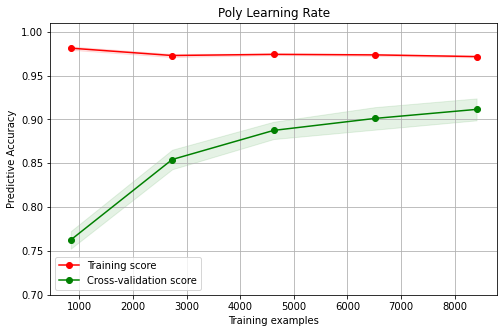

In [18]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
fig, axes = plt.subplots(1,1, figsize=(8, 5))
plot_learning_curve(svm, "Poly Learning Rate", X_train, y_train, axes=[axes], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

## KNN Algorithm

KNN Train Accuracy 0.7193320488118176
KNN Test Accuracy 0.6870719178082192
[learning_curve] Training set sizes: [ 840 2732 4623 6515 8407]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  50 | elapsed:   24.5s remaining:   24.5s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   44.9s finished


CV Scores: [0.53928351 0.61003779 0.64364701 0.66152286 0.66848195]


<module 'matplotlib.pyplot' from '/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

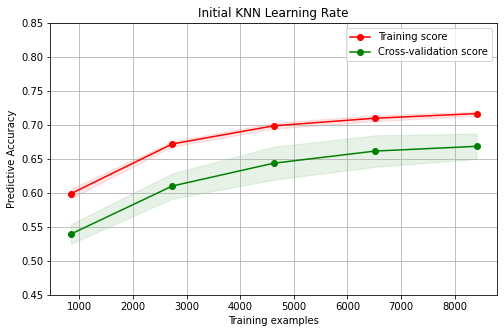

In [19]:
knn = KNeighborsClassifier(n_neighbors=10,
                           algorithm='auto',
                           leaf_size=10)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print('KNN Train Accuracy' , accuracy_score(y_train, y_train_pred))
print('KNN Test Accuracy' , accuracy_score(y_test, y_test_pred))

cv = KFold(n_splits=10, random_state=0, shuffle=True)
fig, axes = plt.subplots(1,1, figsize=(8, 5))
plot_learning_curve(knn, "Initial KNN Learning Rate", X_train, y_train, axes=[axes], ylim=(0.45, 0.85),
                    cv=cv, n_jobs=4)

In [20]:
knn_params = {
    "n_neighbors":range(1,10),
    "leaf_size":range(25,35),
    "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn,
                    param_grid = knn_params,
                    cv=10,
                    verbose=1,
                    n_jobs=-1
)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
{'algorithm': 'ball_tree', 'leaf_size': 33, 'n_neighbors': 4}


In [21]:
start_time = time.time();
knn = KNeighborsClassifier(n_neighbors=4,
                           algorithm='auto',
                           leaf_size=33)
knn.fit(X_train, y_train)

print("Execution Time:",time.time()-start_time)


start_time = time.time();
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("Prediction Time:",time.time()-start_time, "for",len(X_train) + len(X_test),"samples")

print("K = 4")
print('Decision Tree Train Accuracy' , accuracy_score(y_train, y_train_pred))
print("Decision Tree Train r2 score:",r2(y_train, y_train_pred))
print('KNN Test Accuracy' , accuracy_score(y_test, y_test_pred))
print("KNN Test r2 score:",r2(y_test, y_test_pred))
print("F1 SCORE:",round(f1_score(y_test, y_test_pred, average='micro'),3))

Execution Time: 0.017633676528930664
Prediction Time: 3.9266252517700195 for 11678 samples
K = 4
Decision Tree Train Accuracy 0.781631342324984
Decision Tree Train r2 score: 0.7120878957398408
KNN Test Accuracy 0.682791095890411
KNN Test r2 score: 0.563525217280378
F1 SCORE: 0.683


[learning_curve] Training set sizes: [ 840 2732 4623 6515 8407]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  50 | elapsed:   15.2s remaining:   15.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   29.5s finished


CV Scores: [0.56186811 0.61945562 0.64568024 0.66420021 0.67158722]


<module 'matplotlib.pyplot' from '/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

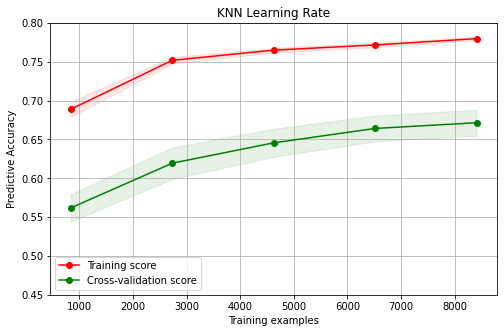

In [22]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
fig, axes = plt.subplots(1,1, figsize=(8, 5))
plot_learning_curve(knn, "KNN Learning Rate", X_train, y_train, axes=[axes], ylim=(0.45, 0.8),
                    cv=cv, n_jobs=4)

Boosted Tree Train Accuracy 0.7940483836437594
Boosted Tree Test Accuracy 0.793236301369863
[learning_curve] Training set sizes: [ 840 2732 4623 6515 8407]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  50 | elapsed:   18.8s remaining:   18.8s


CV Scores: [0.67480276 0.70766618 0.77713577 0.76632333 0.78730662]


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   35.9s finished


<module 'matplotlib.pyplot' from '/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

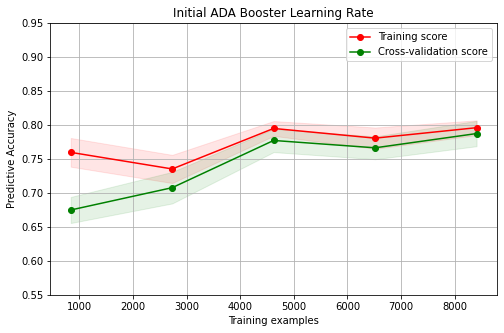

In [23]:
booster = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=2, 
                                  criterion='entropy',
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  random_state=0),
    n_estimators=50,
    learning_rate=0.1,
    random_state=0) 
booster.fit(X_train, y_train)

y_test_pred = booster.predict(X_test)
y_train_pred = booster.predict(X_train)
print('Boosted Tree Train Accuracy' , accuracy_score(y_train, y_train_pred))
print('Boosted Tree Test Accuracy' , accuracy_score(y_test, y_test_pred))

cv = KFold(n_splits=10, random_state=0, shuffle=True)
fig, axes = plt.subplots(1,1, figsize=(8, 5))
plot_learning_curve(booster, "Initial ADA Booster Learning Rate", X_train, y_train, axes=[axes], ylim=(0.55, 0.95),
                    cv=cv, n_jobs=4)

In [24]:
start_time = time.time();
booster = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=6,#Tested values between 1 and 20
                                  criterion='gini',
                                  random_state=0,
                                  min_samples_leaf=1,
                                  min_samples_split=3),
    n_estimators=500,
    learning_rate=0.5,#0.5: 0.908  #tested values between 0.01 and 1
    random_state=0)
booster.fit(X_train, y_train)

print("Execution Time:",time.time()-start_time)
start_time = time.time();

y_test_pred = booster.predict(X_test)
y_train_pred = booster.predict(X_train)
print("Prediction Time:",time.time()-start_time, "for",len(X_train) + len(X_test),"samples")

print('Boosted Tree Train Accuracy' , accuracy_score(y_train, y_train_pred))
print("Boosted Tree Train r2 score:",r2(y_train, y_train_pred))
print('Boosted Tree Test Accuracy' , accuracy_score(y_test, y_test_pred))
print("Boosted Tree Test r2 score:",r2(y_test, y_test_pred))
print("F1 SCORE:",round(f1_score(y_test, y_test_pred, average='micro'),3))

Execution Time: 79.5453200340271
Prediction Time: 2.5433766841888428 for 11678 samples
Boosted Tree Train Accuracy 0.9990366088631984
Boosted Tree Train r2 score: 0.9977620087830011
Boosted Tree Test Accuracy 0.898972602739726
Boosted Tree Test r2 score: 0.6850718515305889
F1 SCORE: 0.899


In [25]:
if False:#Turn to true to run cell.  Takes > 15 minutes.
    start_time = time.time();
    train_accuracies = [];
    test_accuracies = [];
    for i in range(1,1001,50):
        booster = AdaBoostClassifier(
            tree.DecisionTreeClassifier(max_depth=6,#Tested values between 1 and 20
                                      criterion='gini',
                                      random_state=0,
                                      min_samples_leaf=1,
                                      min_samples_split=3),
            n_estimators=i,
            learning_rate=0.5,
            random_state=0) 
        booster.fit(X_train, y_train)
        y_test_pred = booster.predict(X_test)
        y_train_pred = booster.predict(X_train)
        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
        print(i,end=" ")
    print("Training Scores:",train_accuracies)
    print("Testing Scores:",test_accuracies)

In [26]:
plt.plot(range(1,1001,50),train_accuracies,marker='o',label="Training Set")
plt.plot(range(1,1001,50),test_accuracies,marker='o',label="Testing Set")
plt.xlabel('Estimators')
plt.ylabel('Classification Accuracy')
plt.title("Adaptive Boosting Accuracy by Estimator Count")
plt.legend()
plt.show()

NameError: name 'train_accuracies' is not defined

[learning_curve] Training set sizes: [ 840 2732 4623 6515 8407]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  50 | elapsed:  6.8min remaining:  6.8min


CV Scores: [0.80903755 0.885144   0.89263429 0.90045151 0.89895018]


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 13.5min finished


<module 'matplotlib.pyplot' from '/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

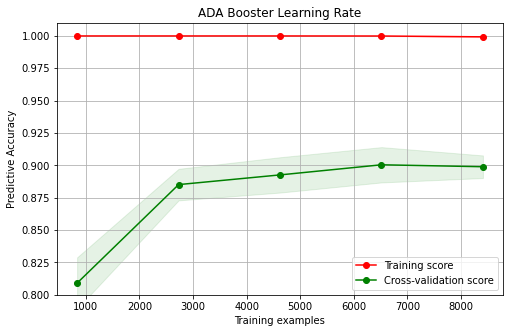

In [27]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
fig, axes = plt.subplots(1,1, figsize=(8, 5))
plot_learning_curve(booster, "ADA Booster Learning Rate", X_train, y_train, axes=[axes], ylim=(0.8, 1.01),
                    cv=cv, n_jobs=4)

## Neural Network

/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Neural Network Train Accuracy 0.8210233354742025
Neural Network Test Accuracy 0.8133561643835616
[learning_curve] Training set sizes: [ 840 2732 4623 6515 8407]


[Parallel(n_jobs=4)]: Done  25 out of  50 | elapsed:    3.9s remaining:    3.9s


CV Scores: [0.65092947 0.760116   0.78441904 0.79458496 0.78720013]


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    7.9s finished


<module 'matplotlib.pyplot' from '/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

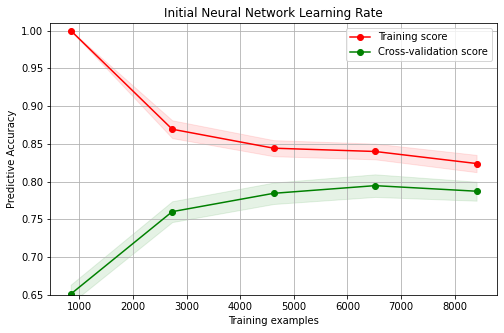

In [28]:
nn = MLPClassifier(activation='relu',
                   hidden_layer_sizes=(32,),
                   solver='lbfgs',
                   verbose=True,
                   max_iter=50,
                   random_state=1,
                   early_stopping=True)

nn.fit(X_train, y_train)
y_test_pred = nn.predict(X_test)
y_train_pred = nn.predict(X_train)

print('Neural Network Train Accuracy' , accuracy_score(y_train, y_train_pred))
print('Neural Network Test Accuracy' , accuracy_score(y_test, y_test_pred))

cv = KFold(n_splits=10, random_state=0, shuffle=True)
fig, axes = plt.subplots(1,1, figsize=(8, 5))
plot_learning_curve(nn, "Initial Neural Network Learning Rate", X_train, y_train, axes=[axes], ylim=(0.65, 1.01),
                    cv=cv, n_jobs=4)

In [29]:
nn_params = {
    "hidden_layer_sizes":[(64,),(),(64,32),(32,)],
    "activation":['identity', 'logistic', 'tanh', 'relu'],
    "solver":['lbfgs', 'sgd', 'adam'],
    "verbose":[True]
}

nn = MLPClassifier()
grid = GridSearchCV(nn,
                    param_grid = nn_params,
                    cv=10,
                    verbose=1,
                    n_jobs=-1
)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'activation': 'relu', 'hidden_layer_sizes': (64,), 'solver': 'lbfgs', 'verbose': True}


In [30]:
start_time = time.time();
nn = MLPClassifier(activation='relu',
                   hidden_layer_sizes=(64,),
                   solver='lbfgs',
                   verbose=True,
                   max_iter=200,
                   random_state=1,
                   early_stopping=True)

nn.fit(X_train, y_train)
print("Execution Time:",time.time()-start_time)
start_time = time.time();

y_test_pred = nn.predict(X_test)
y_train_pred = nn.predict(X_train)
print("Prediction Time:",time.time()-start_time, "for",len(X_train) + len(X_test),"samples")

print('Neural Network Train Accuracy' , accuracy_score(y_train, y_train_pred))
print('Neural Network Train r2 score:',r2(y_train, y_train_pred))
print('Neural Network Test Accuracy' , accuracy_score(y_test, y_test_pred))
print("Neural Network Test r2 score:",r2(y_test, y_test_pred))
print("F1 SCORE:",round(f1_score(y_test, y_test_pred, average='micro'),3))


Execution Time: 5.534358739852905
Prediction Time: 0.03495526313781738 for 11678 samples
Neural Network Train Accuracy 1.0
Neural Network Train r2 score: 1.0
Neural Network Test Accuracy 0.9250856164383562
Neural Network Test r2 score: 0.8450850566323782
F1 SCORE: 0.925


In [31]:
nn_scores_train = [];
nn_scores = [];
for i in range(20):
    nn = MLPClassifier(activation='relu',
                   hidden_layer_sizes=(64,),
                   solver='lbfgs',
                   verbose=False,
                   max_iter=i*10+1,
                   random_state=1)
    
    nn.fit(X_train,y_train);
    y_test_pred = nn.predict(X_test)
    nn_scores_train.append(accuracy_score(y_train, y_train_pred))
    nn_scores.append(accuracy_score(y_test, y_test_pred))
    print("I",i)
print("Training Scores:",nn_scores_train)
print("Testing Scores:",nn_scores)

/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 0


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 1


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 2


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 3


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 4


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 5


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 6


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 7


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 8


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 9


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 10


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 11


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 12


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 13


/home/aarush100616/anaconda3/envs/opencv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


I 14
I 15
I 16
I 17
I 18
I 19
Training Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Testing Scores: [0.2662671232876712, 0.6378424657534246, 0.7410102739726028, 0.7949486301369864, 0.8548801369863014, 0.8908390410958904, 0.9126712328767124, 0.9071061643835616, 0.9143835616438356, 0.9216609589041096, 0.9216609589041096, 0.920804794520548, 0.920804794520548, 0.9238013698630136, 0.9246575342465754, 0.9250856164383562, 0.9250856164383562, 0.9250856164383562, 0.9250856164383562, 0.9250856164383562]


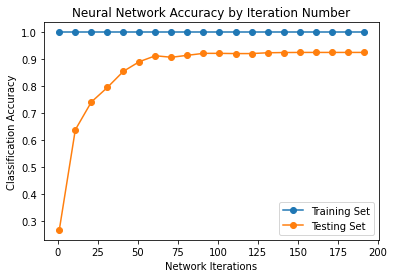

In [32]:
plt.plot(range(1,201,10),nn_scores_train,marker='o',label="Training Set")
plt.plot(range(1,201,10),nn_scores,marker='o',label="Testing Set")
plt.xlabel('Network Iterations')
plt.ylabel('Classification Accuracy')
plt.title("Neural Network Accuracy by Iteration Number")
plt.legend()
plt.show()